# Optimización

## ¿De qué se trata la optimización?

### Minimización

Sea $f:U \subseteq \mathbb{R}^n \to \mathbb{R}$, buscamos $\mathbf{x^*}\in U$ tal que $\forall \; \mathbf{x} \in U \quad f(\mathbf{x^*}) \leq f(\mathbf{x})$. Decimos que $\mathbf{x^*}$ es un **mínimo global** de $f$ en $U$

### ¿Y por qué no hablamos o definimos los máximos?

Sea $f:U \subseteq \mathbb{R}^n \to \mathbb{R}$, buscamos $\mathbf{z^*}\in U$ tal que $\forall \; \mathbf{x} \in U \quad f(\mathbf{z^*}) \geq f(\mathbf{x})$. Decimos que $\mathbf{z^*}$ es un **máximo global** de $f$ en $U$.

Encontrarle un máximo a una función $f$ es equivalente a encontrarle un mínimo a la función $g(x) = - f(x)$



$$
f(\mathbf{z^*}) \geq f(\mathbf{x}) \implies -f(\mathbf{z^*}) \leq -f(\mathbf{x}) \implies g(\mathbf{z^*}) \leq g(\mathbf{x})
$$

### ¿Es fácil encontrar mínimos globales?

NO, ni siquiera en clase de cálculo se puede. Lo que si se puede, más fácilmente, es encontrar **mínimos locales**

Sea $f:U \subseteq \mathbb{R}^n \to \mathbb{R}$, buscamos $\mathbf{x^*}\in W \subset U$ tal que $\forall \; \mathbf{x} \in W \quad f(\mathbf{x^*}) \leq f(\mathbf{x})$. Decimos que $\mathbf{x^*}$ es un **mínimo local** de $f$ en $U$

### ¿Todas las funciones tienen mínimos locales?

SI $W = \{\mathbf{y}\}$, $\mathbf{y}$ es minimo local de cualquier funcion. Si $W$ no es un solo punto, **no todas las funciones tienen mínimos locales**. Por ejemplo $f(x) = 3x +2$

### ¿Es fácil decidir si una función tiene mínimos locales?

NO, tampoco es fácil decidir. Si $f$ es diferenciable, y existen puntos en los que $\nabla f = \mathbf{0}$, **pueden existir, pero no es seguro**

### ¿Si existen, es fácil encontrarlos?

NO. Analíticamente (teóricamente), no hay una manera algorítmica de hacerlo. En general, numéricamente también puede darse que no los encontremos. **Pero es más probable encontrarlos numéricamente**

### Caso sencillo: $f:\mathbb{R} \to \mathbb{R}$, es derivable y sabemos que tiene mínimos locales

Ejemplo 1: 

$$f(x) = x^2 - 5x + 6$$

$$
f'(x) = 2x-5
$$

$f'(x)>0$ indica que $f$ es creciente

$f'(x)<0$ indica que $f$ es decreciente

In [2]:
using Plots

In [8]:
function ejemplo1(x)
    return x^2 - 5*x + 6
end
function dejemplo1(x)
    return 2*x-5
end

dejemplo1 (generic function with 1 method)

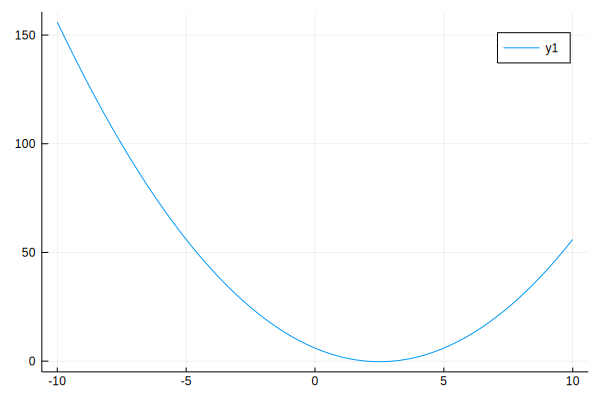

In [3]:
xs = range(-10,stop=10,length=201)
ys = [ejemplo1(x) for x in xs]
fig = Plots.plot()
Plots.plot!(xs,ys)
display(fig)

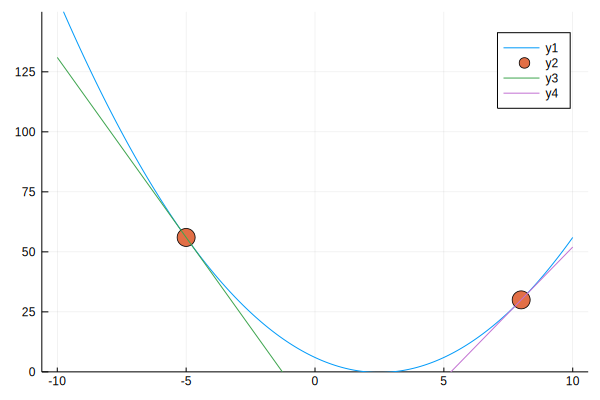

In [13]:
xs = range(-10,stop=10,length=201)
ys = [ejemplo1(x) for x in xs]
fig = Plots.plot()
Plots.plot!(xs,ys)
puntos = [-5,8]
Plots.scatter!(puntos,[ejemplo1(x) for x in puntos],markersize=10)
# hago la recta con pendiente f'(-5) que pasa por el punto (-5,f(-5))
Plots.plot!(xs,[dejemplo1(-5)*(x+5) + ejemplo1(-5) for x in xs])
Plots.plot!(xs,[dejemplo1(8)*(x-8) + ejemplo1(8) for x in xs])
Plots.ylims!(0,150)
display(fig)

La derivada nos indica hacia donde **crece** el valor de la función. Si yo quiero ir a un lugar donde **no crece**, es decir, donde es mínimo, me debo de mover en **dirección contraria a la derivada**.

Podemos usar esta idea para proponer un esquema recursivo para ir construyendo una sucesión que se acerque a un mínimo.

## Descenso de gradiente

Supongamos que tenemos un valor $x_{k}$ tal que está cerca de un mínimo. ¿Cómo nos acercamos más a ese mínimo?

$$
x_{k+1} = x_{k} - \alpha \cdot f'(x_{k})
$$

con $0 < \alpha < 1$. $\alpha$ es el tamaño de paso. Para poder poder implementar la sucesión, tengo que dar un punto inicial $x_{1}$.

$$
x_{k} = \begin{cases}
    x_1 & \text{si } k=1 \\
    x_{k-1} - \alpha \cdot f'(x_{k-1}) & \text{si } k>1 \\
\end{cases}
$$

### Problemas con los índices

mi_lista[1] = x_1

.
.
.

mi_lista[k] = x_k

In [14]:
function desGrad(df,x1,alpha,n)
    mi_lista = []
    push!(mi_lista,x1)
    for k in range(2,stop=n)
        # añado el x_k
        push!(mi_lista,mi_lista[k-1]-alpha*df(mi_lista[k-1]))
    end
    return mi_lista
end
    

desGrad (generic function with 1 method)

In [32]:
desGrad(dejemplo1,3.0,0.1,20)

20-element Array{Any,1}:
 3.0
 2.9
 2.82
 2.756
 2.7047999999999996
 2.6638399999999995
 2.6310719999999996
 2.6048576
 2.58388608
 2.567108864
 2.5536870912
 2.54294967296
 2.534359738368
 2.5274877906944
 2.52199023255552
 2.517592186044416
 2.514073748835533
 2.5112589990684264
 2.509007199254741
 2.507205759403793

In [33]:
function ejemplo2(x)
    return x*sin(x)
end
function dejemplo2(x)
    return x*cos(x) + sin(x)
end

dejemplo2 (generic function with 1 method)

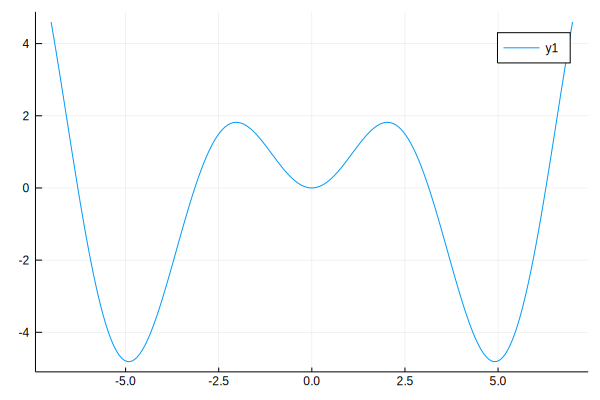

In [35]:
xs = range(-7,stop=7,length=201)
ys = [ejemplo2(x) for x in xs]
fig = Plots.plot()
Plots.plot!(xs,ys)
display(fig)

In [42]:
desGrad(dejemplo2,2.6,0.1,1000)

1000-element Array{Any,1}:
 2.6
 2.77124093869378
 2.9933817150779936
 3.2746713049311813
 3.6125116224897917
 3.979811760055631
 4.320322079675116
 4.577813409866136
 4.73832964592083
 4.826005837933872
 4.870647422728543
 4.892637000390679
 4.903304870873118
 ⋮
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884
 4.913180439434884